In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

In [31]:
# Open the file
with open('water.lammpstrj', 'r') as f:
    data = f.readlines()
n_atoms = int(data[3].strip()) # Total number of atoms in the system

In [32]:
# Helper function to return a list of coordinates for the
# frame of interest. `start` and `end` variables are the line
# numbers to read.

def get_cordinates_for_frame(data, start, end):
    coordinates = []
    for l in data[start: end+1]:
        s = l.split()
        try:
            if int(s[1]) == 2: # Get only oxygen atoms
                coordinates.append([float(s[3]), float(s[4]), float(s[5])])
        except:
            continue
    return coordinates

In [33]:
# Helper function to calculate the distance between atoms
# keeping in mind the boundary conditions

def distance_between_points(p, q):
    distance_x = abs(p[0] - q[0])
    distance_x = min(distance_x, abs(box_size - distance_x))
    distance_y = abs(p[1] - q[1])
    distance_y = min(distance_y, abs(box_size - distance_y))
    distance_z = abs(p[2] - q[2])
    distance_z = min(distance_z, abs(box_size - distance_z))
    
    return np.lib.scimath.sqrt(distance_x**2 + distance_y**2 + distance_z**2)

In [34]:
# Initialise the calculation

n_bins = 200
n_frames = 3
box_size = 62
increment = box_size / (2 * n_bins)
r_cut = box_size / 3 #r_cut value can be changed accordingly

In [35]:
# Loop over all the frames and for each frame and find the distribution of distances

distribution = np.zeros(n_bins)

for k in range(n_frames):
    start = k*n_atoms + (k+1)*9
    end = start + n_atoms
    coordinates = []
    coordinates = get_cordinates_for_frame(data, start, end)
    n_particles = len(coordinates)
    print(n_particles)
    for i in range(n_particles-1):
        for j in range(i+1, n_particles):
            distance = distance_between_points(coordinates[i], coordinates[j])
            if distance < (r_cut):
                ig = int(distance / increment)
                distribution[ig] = distribution[ig] + 2

8000
8000
8000


In [36]:
# Calculate g(r) by normalising the distribution
for j in range(n_bins):
    distribution[j] = distribution[j]/(n_frames*n_particles)

density = n_particles/box_size**3
for j in range(n_bins):
    r1 = j * increment
    r2 = r1 + increment
    vol_bin = (4/3) * sp.pi * (r2**3 - r1**3)
    n_ideal = vol_bin * density
    distribution[j] = distribution[j] / (n_ideal)
    
print(distribution)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.81919353e-04 1.76558574e-02 7.63767133e-02
 5.51295580e-01 1.78291636e+00 1.49205822e+00 2.10723376e+00
 2.45068321e+00 5.52050780e-01 5.57094689e-01 5.98007650e-01
 6.11787713e-01 6.54321783e-01 6.88739806e-01 7.21984059e-01
 3.86915659e+00 7.28784565e-01 7.04136595e-01 6.95534367e-01
 6.78957297e-01 6.56520049e-01 2.05435115e+00 6.14899606e-01
 5.99668112e-01 6.12439085e-01 6.36297669e-01 1.07651438e+00
 1.03998910e+00 6.77648297e-01 6.99970430e-01 6.92045054e-01
 3.27171771e+00 6.91379733e-01 6.81542341e-01 6.72922806e-01
 2.83127555e+00 6.66303003e-01 6.49080080e-01 6.58781853e-01
 6.60890468e-01 6.53133928e-01 6.64035645e-01 6.60938221e-01
 1.46677807e+00 6.71502608e-01 6.67204432e-01 1.63051025e+00
 1.47967283e+00 6.67533450e-01 6.66008909e-01 1.93176499e+00
 6.65081741e-01 6.685472

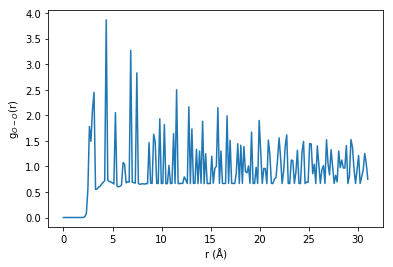

In [30]:
# for r_cut = box_size/2
radii = np.linspace(0.0, n_bins*increment, n_bins)
plt.xlabel('r (Å)')
plt.ylabel('g$_{O-O}$(r)')
plt.plot(radii, distribution)
plt.show()

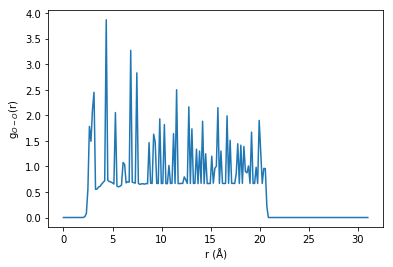

In [37]:
# for r_cut = box_size/3
radii = np.linspace(0.0, n_bins*increment, n_bins)
plt.xlabel('r (Å)')
plt.ylabel('g$_{O-O}$(r)')
plt.plot(radii, distribution)
plt.show()